# Decision Tree

This notebook shows the Decision Tree model for the spambase data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Timer, plot_learning_curve

In [2]:
df = pd.read_csv("spambase.csv")

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('class',axis=1))

scaled_features = scaler.transform(df.drop('class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


### Modelling

1. Split dataset into training and test set

In [7]:
from sklearn.model_selection import train_test_split

X = df_feat
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# Set up timer
t = Timer()

## Decision Trees 

For decision trees, I used 2 implementation described as "Base" and "Advanced"

Base model
- Criterion: Entropy
- No pruning

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score

t.start()
dt_base = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
dt_base.fit(X_train, y_train)
y_pred_dt_base_train = dt_base.predict(X_train)
y_pred_dt_base_test = dt_base.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_dt_base_train)
precision_train = precision_score(y_train, y_pred_dt_base_train)
recall_train = recall_score(y_train, y_pred_dt_base_train)
f1_train = f1_score(y_train, y_pred_dt_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_dt_base_train)

accuracy_test = accuracy_score(y_test, y_pred_dt_base_test)
precision_test = precision_score(y_test, y_pred_dt_base_test)
recall_test = recall_score(y_test, y_pred_dt_base_test)
f1_test = f1_score(y_test, y_pred_dt_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_base_test)

print(f"Train Accuracy of Base Decision Tree: {accuracy_train:.3f}")
print(f"Train Precision of Base Decision Tree: {precision_train:.3f}")
print(f"Train Recall of Base Decision Tree: {recall_train:.3f}")
print(f"Train F1 of Base Decision Tree: {f1_train:.3f}")
print(f"Train ROC AUC of Base Decision Tree: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of Base Decision Tree: {accuracy_test:.3f}")
print(f"Test Precision of Base Decision Tree: {precision_test:.3f}")
print(f"Test Recall of Base Decision Tree: {recall_test:.3f}")
print(f"Test F1 of Base Decision Tree: {f1_test:.3f}")
print(f"Test ROC AUC of Base Decision Tree: {roc_auc_test:.3f}")

Elapsed time: 0.0313 seconds
Train Accuracy of Base Decision Tree: 1.000
Train Precision of Base Decision Tree: 1.000
Train Recall of Base Decision Tree: 0.999
Train F1 of Base Decision Tree: 1.000
Train ROC AUC of Base Decision Tree: 1.000
---
Test Accuracy of Base Decision Tree: 0.920
Test Precision of Base Decision Tree: 0.913
Test Recall of Base Decision Tree: 0.893
Test F1 of Base Decision Tree: 0.903
Test ROC AUC of Base Decision Tree: 0.916


In [11]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
dt_base_res = cross_validate(
      estimator=dt_base,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True,
      n_jobs=-1
      )
t.stop()

Elapsed time: 3.4924 seconds


In [12]:
training_metrics = ["train_accuracy", "train_precision", "train_recall", "train_f1"]
testing_metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1"]
for m in training_metrics:
    print(f"{m}: {np.mean(dt_base_res[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(dt_base_res[m]):.3f}")

train_accuracy: 1.000
train_precision: 1.000
train_recall: 0.999
train_f1: 1.000
----
test_accuracy: 0.911
test_precision: 0.885
test_recall: 0.882
test_f1: 0.883


Plot learning curve of decision tree

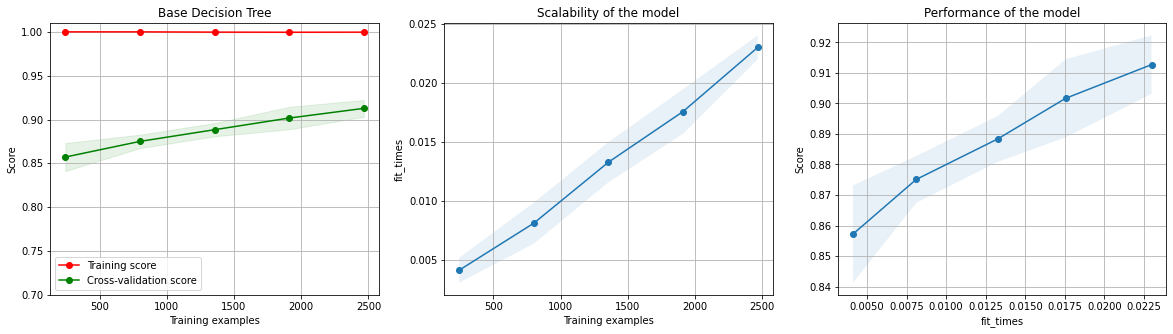

In [13]:
title = "Base Decision Tree"
plot_learning_curve(
    dt_base, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [14]:
y_pred_dt_base_train = cross_val_predict(dt_base, X_train, y_train, cv=5)
y_pred_dt_base_test = cross_val_predict(dt_base, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_dt_base_train)
precision_train = precision_score(y_train, y_pred_dt_base_train)
recall_train = recall_score(y_train, y_pred_dt_base_train)
f1_train = f1_score(y_train, y_pred_dt_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_dt_base_train)

accuracy_test = accuracy_score(y_test, y_pred_dt_base_test)
precision_test = precision_score(y_test, y_pred_dt_base_test)
recall_test = recall_score(y_test, y_pred_dt_base_test)
f1_test = f1_score(y_test, y_pred_dt_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_base_test)

print(f"Train Accuracy of Base Decision Tree: {accuracy_train:.3f}")
print(f"Train Precision of Base Decision Tree: {precision_train:.3f}")
print(f"Train Recall of Base Decision Tree: {recall_train:.3f}")
print(f"Train F1 of Base Decision Tree: {f1_train:.3f}")
print(f"Train ROC AUC of Base Decision Tree: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of Base Decision Tree: {accuracy_test:.3f}")
print(f"Test Precision of Base Decision Tree: {precision_test:.3f}")
print(f"Test Recall of Base Decision Tree: {recall_test:.3f}")
print(f"Test F1 of Base Decision Tree: {f1_test:.3f}")
print(f"Test ROC AUC of Base Decision Tree: {roc_auc_test:.3f}")

Train Accuracy of Base Decision Tree: 0.911
Train Precision of Base Decision Tree: 0.884
Train Recall of Base Decision Tree: 0.882
Train F1 of Base Decision Tree: 0.883
Train ROC AUC of Base Decision Tree: 0.905
---
Test Accuracy of Base Decision Tree: 0.895
Test Precision of Base Decision Tree: 0.880
Test Recall of Base Decision Tree: 0.866
Test F1 of Base Decision Tree: 0.873
Test ROC AUC of Base Decision Tree: 0.891


Pruning methodology

Text(0, 0.5, 'total impurity of leaves')

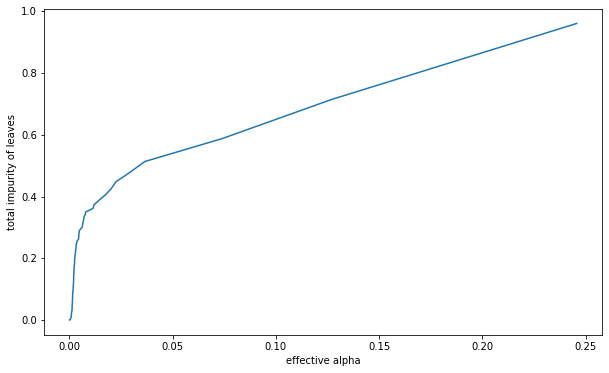

In [15]:
path = dt_base.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [16]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = "entropy", random_state = 0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

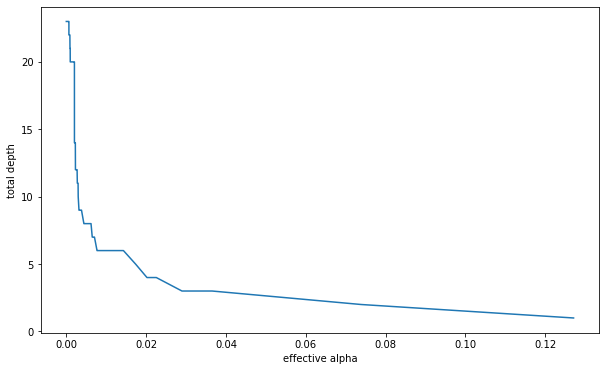

In [17]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


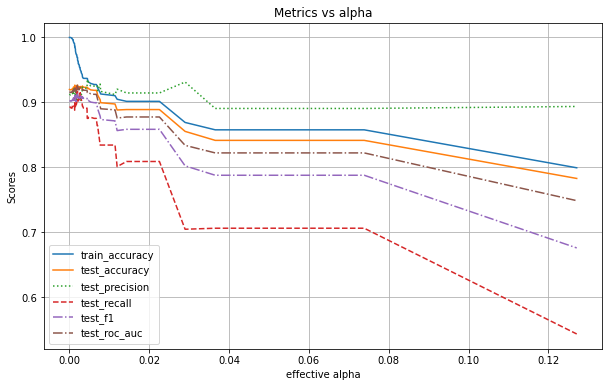

In [42]:
train_accuracy_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_accuracy_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

test_recall_scores = [recall_score(y_test, clf.predict(X_test)) for clf in clfs]
test_precision_scores = [precision_score(y_test, clf.predict(X_test)) for clf in clfs]
test_f1_scores = [f1_score(y_test, clf.predict(X_test)) for clf in clfs]
test_roc_auc_scores = [roc_auc_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], train_accuracy_scores[:-1], label="train_accuracy")
plt.plot(ccp_alphas[:-1], test_accuracy_scores[:-1], label="test_accuracy")
plt.plot(ccp_alphas[:-1], test_precision_scores[:-1], label="test_precision", linestyle="dotted")
plt.plot(ccp_alphas[:-1], test_recall_scores[:-1], label="test_recall", linestyle="dashed")
plt.plot(ccp_alphas[:-1], test_f1_scores[:-1], label="test_f1", linestyle="dashdot")
plt.plot(ccp_alphas[:-1], test_roc_auc_scores[:-1], label="test_roc_auc", linestyle="dashdot")
plt.title("Metrics vs alpha")
plt.xlabel("effective alpha")
plt.ylabel("Scores")
plt.legend()

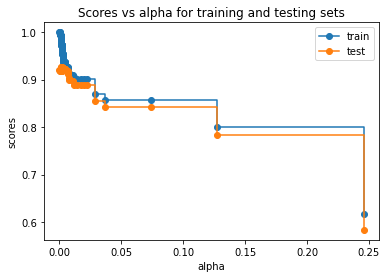

In [19]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("scores")
ax.set_title("Scores vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [20]:
print(f"For the best F1 score: {max(test_f1_scores)}")
highest_score_index = test_f1_scores.index(max(test_f1_scores))
print(f"Train Accuracy: {train_accuracy_scores[highest_score_index]}")
print(f"Test Accuracy: {test_accuracy_scores[highest_score_index]}")
print(f"Test Precision: {test_precision_scores[highest_score_index]}")
print(f"Test Recall: {test_recall_scores[highest_score_index]}")
print(f"Test F1: {test_f1_scores[highest_score_index]}")
print(f"Test ROC AUC: {test_roc_auc_scores[highest_score_index]}")
best_alpha = ccp_alphas[:-1][highest_score_index]
print(f"The best alpha to set is {best_alpha:.5f}")

For the best F1 score: 0.9126365054602185
Train Accuracy: 0.9688513951979234
Test Accuracy: 0.9262672811059908
Test Precision: 0.901386748844376
Test Recall: 0.9241706161137441
Test F1: 0.9126365054602185
Test ROC AUC: 0.92596792656703
The best alpha to set is 0.00195


Advanced model
- Criterion: Entropy
- With cross validation (k=5)
- With pruning, best alpha

In [43]:
t.start()
dt_adv = DecisionTreeClassifier(
    criterion = "entropy", 
    random_state = 0, 
    ccp_alpha=best_alpha
)
dt_adv.fit(X_train, y_train)
y_pred_dt_adv_train = dt_adv.predict(X_train)
y_pred_dt_adv_test = dt_adv.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_dt_adv_train)
precision_train = precision_score(y_train, y_pred_dt_adv_train)
recall_train = recall_score(y_train, y_pred_dt_adv_train)
f1_train = f1_score(y_train, y_pred_dt_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_dt_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_dt_adv_test)
precision_test = precision_score(y_test, y_pred_dt_adv_test)
recall_test = recall_score(y_test, y_pred_dt_adv_test)
f1_test = f1_score(y_test, y_pred_dt_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_adv_test)

print(f"Train Accuracy of Advanced Decision Tree with best alpha: {accuracy_train:.3f}")
print(f"Train Precision of Advanced Decision Tree with best alpha: {precision_train:.3f}")
print(f"Train Recall of Advanced Decision Tree with best alpha: {recall_train:.3f}")
print(f"Train F1 of Advanced Decision Tree with best alpha: {f1_train:.3f}")
print(f"Train ROC AUC of Advanced Decision Tree with best alpha: {roc_auc_train:.3f}")
print("---")
print(f"Test Accuracy of Advanced Decision Tree with best alpha: {accuracy_test:.3f}")
print(f"Test Precision of Advanced Decision Tree with best alpha: {precision_test:.3f}")
print(f"Test Recall of Advanced Decision Tree with best alpha: {recall_test:.3f}")
print(f"Test F1 of Advanced Decision Tree with best alpha: {f1_test:.3f}")
print(f"Test ROC AUC of Advanced Decision Tree with best alpha: {roc_auc_test:.3f}")

Elapsed time: 0.0333 seconds
Train Accuracy of Advanced Decision Tree with best alpha: 0.969
Train Precision of Advanced Decision Tree with best alpha: 0.948
Train Recall of Advanced Decision Tree with best alpha: 0.972
Train F1 of Advanced Decision Tree with best alpha: 0.960
Train ROC AUC of Advanced Decision Tree with best alpha: 0.969
---
Test Accuracy of Advanced Decision Tree with best alpha: 0.926
Test Precision of Advanced Decision Tree with best alpha: 0.901
Test Recall of Advanced Decision Tree with best alpha: 0.924
Test F1 of Advanced Decision Tree with best alpha: 0.913
Test ROC AUC of Advanced Decision Tree with best alpha: 0.926


In [44]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
dt_adv_res = cross_validate(
      estimator=dt_adv,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 0.1790 seconds


In [45]:
for m in training_metrics:
    print(f"{m}: {np.mean(dt_adv_res[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(dt_adv_res[m]):.3f}")

train_accuracy: 0.979
train_precision: 0.975
train_recall: 0.970
train_f1: 0.972
----
test_accuracy: 0.912
test_precision: 0.890
test_recall: 0.879
test_f1: 0.884


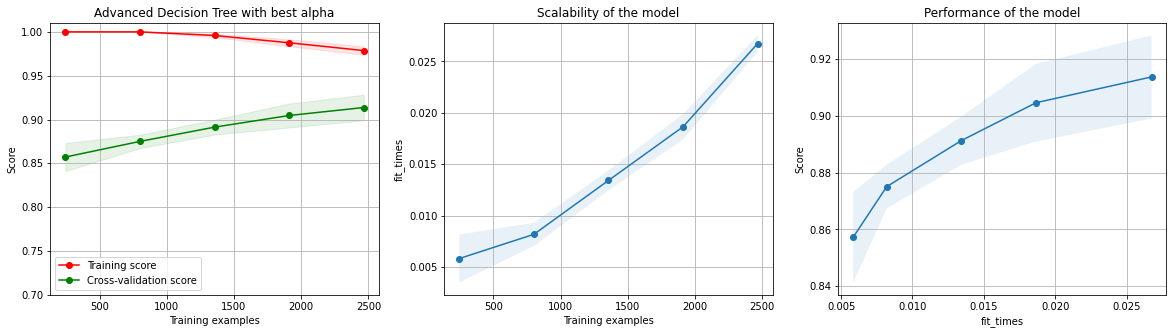

In [46]:
title = "Advanced Decision Tree with best alpha"
plot_learning_curve(
    dt_adv, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [47]:
y_pred_dt_adv_train = cross_val_predict(dt_adv, X_train, y_train, cv=5)
y_pred_dt_adv_test = cross_val_predict(dt_adv, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_dt_adv_train)
precision_train = precision_score(y_train, y_pred_dt_adv_train)
recall_train = recall_score(y_train, y_pred_dt_adv_train)
f1_train = f1_score(y_train, y_pred_dt_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_dt_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_dt_adv_test)
precision_test = precision_score(y_test, y_pred_dt_adv_test)
recall_test = recall_score(y_test, y_pred_dt_adv_test)
f1_test = f1_score(y_test, y_pred_dt_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_adv_test)

print(f"Train Accuracy of Advanced Decision Tree with best alpha: {accuracy_train:.3f}")
print(f"Train Precision of Advanced Decision Tree with best alpha: {precision_train:.3f}")
print(f"Train Recall of Advanced Decision Tree with best alpha: {recall_train:.3f}")
print(f"Train F1 of Advanced Decision Tree with best alpha: {f1_train:.3f}")
print(f"Train ROC AUC of Advanced Decision Tree with best alpha: {roc_auc_train:.3f}")
print("---")
print(f"Test Accuracy of Advanced Decision Tree with best alpha: {accuracy_test:.3f}")
print(f"Test Precision of Advanced Decision Tree with best alpha: {precision_test:.3f}")
print(f"Test Recall of Advanced Decision Tree with best alpha: {recall_test:.3f}")
print(f"Test F1 of Advanced Decision Tree with best alpha: {f1_test:.3f}")
print(f"Test ROC AUC of Advanced Decision Tree with best alpha: {roc_auc_test:.3f}")

Train Accuracy of Advanced Decision Tree with best alpha: 0.912
Train Precision of Advanced Decision Tree with best alpha: 0.889
Train Recall of Advanced Decision Tree with best alpha: 0.879
Train F1 of Advanced Decision Tree with best alpha: 0.884
Train ROC AUC of Advanced Decision Tree with best alpha: 0.905
---
Test Accuracy of Advanced Decision Tree with best alpha: 0.895
Test Precision of Advanced Decision Tree with best alpha: 0.882
Test Recall of Advanced Decision Tree with best alpha: 0.863
Test F1 of Advanced Decision Tree with best alpha: 0.872
Test ROC AUC of Advanced Decision Tree with best alpha: 0.890


Final test set performance

In [48]:
y_pred_base_dt_train_f = dt_base.predict(X_train)
y_pred_adv_dt_train_f = dt_adv.predict(X_train)

accuracy_base_train = accuracy_score(y_train, y_pred_base_dt_train_f)
precision_base_train = precision_score(y_train, y_pred_base_dt_train_f)
recall_base_train = recall_score(y_train, y_pred_base_dt_train_f)
f1_base_train = f1_score(y_train, y_pred_base_dt_train_f)
roc_base_train = roc_auc_score(y_train, y_pred_base_dt_train_f)

accuracy_adv_train = accuracy_score(y_train, y_pred_adv_dt_train_f)
precision_adv_train = precision_score(y_train, y_pred_adv_dt_train_f)
recall_adv_train = recall_score(y_train, y_pred_adv_dt_train_f)
f1_adv_train = f1_score(y_train, y_pred_adv_dt_train_f)
roc_adv_train = roc_auc_score(y_train, y_pred_adv_dt_train_f)

y_pred_base_dt_test_f = dt_base.predict(X_test)
y_pred_adv_dt_test_f = dt_adv.predict(X_test)

accuracy_base_test = accuracy_score(y_test, y_pred_base_dt_test_f)
precision_base_test = precision_score(y_test, y_pred_base_dt_test_f)
recall_base_test = recall_score(y_test, y_pred_base_dt_test_f)
f1_base_test = f1_score(y_test, y_pred_base_dt_test_f)
roc_base_test = roc_auc_score(y_test, y_pred_base_dt_test_f)

accuracy_adv_test = accuracy_score(y_test, y_pred_adv_dt_test_f)
precision_adv_test = precision_score(y_test, y_pred_adv_dt_test_f)
recall_adv_test = recall_score(y_test, y_pred_adv_dt_test_f)
f1_adv_test = f1_score(y_test, y_pred_adv_dt_test_f)
roc_adv_test = roc_auc_score(y_test, y_pred_adv_dt_test_f)

In [49]:
print("Final - Training Set Performance")
print(f"Train Accuracy of Base DT: {accuracy_base_train:.3f}")
print(f"Train Precision of Base DT: {precision_base_train:.3f}")
print(f"Train Recall of Base DT: {recall_base_train:.3f}")
print(f"Train F1 of Base DT: {f1_base_train:.3f}")
print(f"Train ROC of Base DT: {roc_base_train:.3f}")
print("-")
print(f"Train Accuracy of Adv DT: {accuracy_adv_train:.3f}")
print(f"Train Precision of Adv DT: {precision_adv_train:.3f}")
print(f"Train Recall of Adv DT: {recall_adv_train:.3f}")
print(f"Train F1 of Adv DT: {f1_adv_train:.3f}")
print(f"Train ROC of Adv DT: {roc_adv_train:.3f}")

print("---")

print(f"Test Accuracy of Base DT: {accuracy_base_test:.3f}")
print(f"Test Precision of Base DT: {precision_base_test:.3f}")
print(f"Test Recall of Base DT: {recall_base_test:.3f}")
print(f"Test F1 of Base DT: {f1_base_test:.3f}")
print(f"Test ROC of Base DT: {roc_base_test:.3f}")
print("-")
print(f"Test Accuracy of Adv DT: {accuracy_adv_test:.3f}")
print(f"Test Precision of Adv DT: {precision_adv_test:.3f}")
print(f"Test Recall of Adv DT: {recall_adv_test:.3f}")
print(f"Test F1 of Adv DT: {f1_adv_test:.3f}")
print(f"Test ROC of Adv DT: {roc_adv_test:.3f}")

Final - Training Set Performance
Train Accuracy of Base DT: 1.000
Train Precision of Base DT: 1.000
Train Recall of Base DT: 0.999
Train F1 of Base DT: 1.000
Train ROC of Base DT: 1.000
-
Train Accuracy of Adv DT: 0.969
Train Precision of Adv DT: 0.948
Train Recall of Adv DT: 0.972
Train F1 of Adv DT: 0.960
Train ROC of Adv DT: 0.969
---
Test Accuracy of Base DT: 0.920
Test Precision of Base DT: 0.913
Test Recall of Base DT: 0.893
Test F1 of Base DT: 0.903
Test ROC of Base DT: 0.916
-
Test Accuracy of Adv DT: 0.926
Test Precision of Adv DT: 0.901
Test Recall of Adv DT: 0.924
Test F1 of Adv DT: 0.913
Test ROC of Adv DT: 0.926


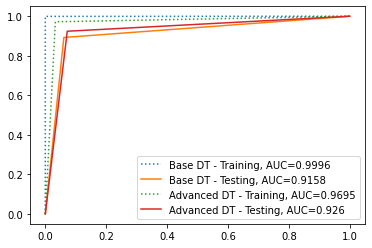

In [50]:
plt.figure(0).clf()

# Basic
fpr, tpr, _ = roc_curve(y_train, y_pred_base_dt_train_f)
auc = round(roc_auc_score(y_train, y_pred_base_dt_train_f), 4)
plt.plot(fpr,tpr,label="Base DT - Training, AUC="+str(auc), linestyle="dotted")

fpr, tpr, _ = roc_curve(y_test, y_pred_base_dt_test_f)
auc = round(roc_auc_score(y_test, y_pred_base_dt_test_f), 4)
plt.plot(fpr,tpr,label="Base DT - Testing, AUC="+str(auc), linestyle="solid")

# ADV

fpr, tpr, _ = roc_curve(y_train, y_pred_adv_dt_train_f)
auc = round(roc_auc_score(y_train, y_pred_adv_dt_train_f), 4)
plt.plot(fpr,tpr,label=f"Advanced DT - Training, AUC="+str(auc), linestyle="dotted")
plt.legend()

fpr, tpr, _ = roc_curve(y_test, y_pred_adv_dt_test_f)
auc = round(roc_auc_score(y_test, y_pred_adv_dt_test_f), 4)
plt.plot(fpr,tpr,label=f"Advanced DT - Testing, AUC="+str(auc), linestyle="solid")
plt.legend()